# ELAIS-N1 master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
9df0d27 (Wed Jun 7 13:33:34 2017 +0100)


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time

from astropy.table import Table
import numpy as np
from matplotlib_venn import venn3

from herschelhelp_internal.masterlist import nb_compare_plot

In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = os.environ.get('SUFFIX', time.strftime("_%Y%m%d"))

master_catalogue = Table.read("{}/master_catalogue_elais-n1{}.fits".format(OUT_DIR, SUFFIX))

## I - Summary of wavelength domains

In [4]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

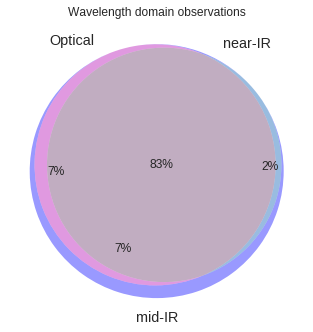

In [5]:
venn3(
    [
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 6),
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 5),
        np.sum(flag_obs == 3),
        np.sum(flag_obs == 7)
    ],
    set_labels=('Optical', 'near-IR', 'mid-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

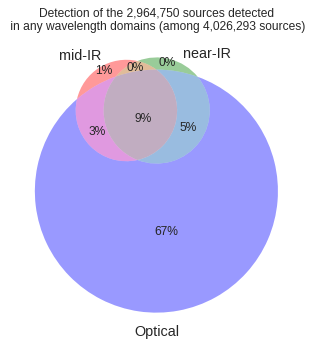

In [6]:
venn3(
    [
        np.sum(flag_det[flag_obs == 7] == 4),
        np.sum(flag_det[flag_obs == 7] == 2),
        np.sum(flag_det[flag_obs == 7] == 6),
        np.sum(flag_det[flag_obs == 7] == 1),
        np.sum(flag_det[flag_obs == 7] == 5),
        np.sum(flag_det[flag_obs == 7] == 3),
        np.sum(flag_det[flag_obs == 7] == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

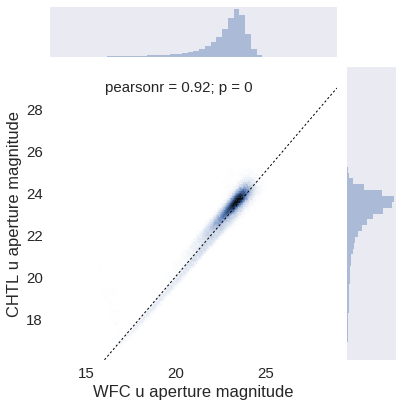

In [7]:
nb_compare_plot(
    master_catalogue['m_app_wfc_u'], master_catalogue['m_app_cfht_megacam_u'],
    ("WFC u aperture magnitude", "CHTL u aperture magnitude")
)

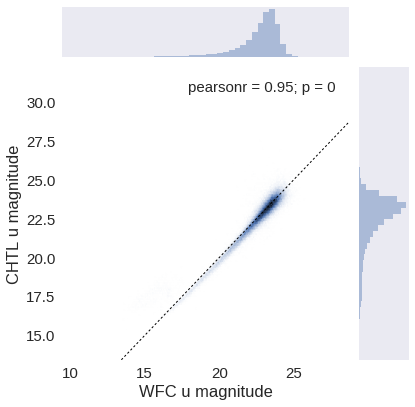

In [8]:
nb_compare_plot(
    master_catalogue['m_wfc_u'], master_catalogue['m_cfht_megacam_u'],
    ("WFC u magnitude", "CHTL u magnitude")
)

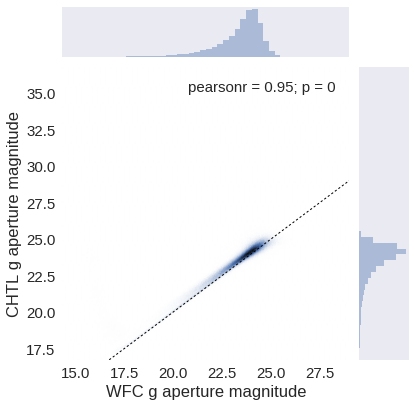

In [9]:
nb_compare_plot(
    master_catalogue['m_app_wfc_g'], master_catalogue['m_app_cfht_megacam_g'],
    ("WFC g aperture magnitude", "CHTL g aperture magnitude")
)

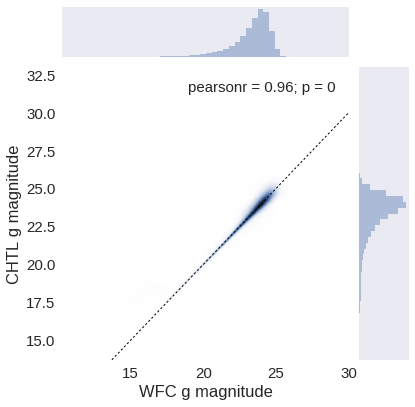

In [10]:
nb_compare_plot(
    master_catalogue['m_wfc_g'], master_catalogue['m_cfht_megacam_g'],
    ("WFC g magnitude", "CHTL g magnitude")
)

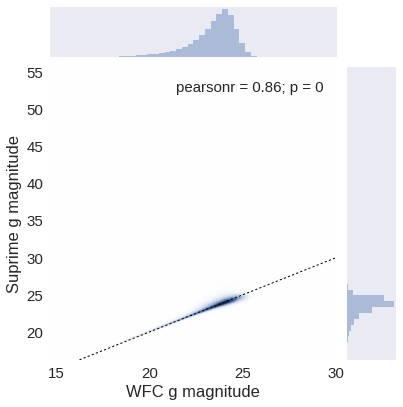

In [11]:
nb_compare_plot(
    master_catalogue['m_wfc_g'], master_catalogue['m_suprime_g'],
    ("WFC g magnitude", "Suprime g magnitude")
)

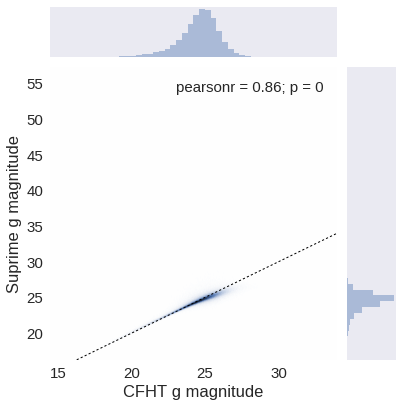

In [12]:
nb_compare_plot(
    master_catalogue['m_cfht_megacam_g'], master_catalogue['m_suprime_g'],
    ("CFHT g magnitude", "Suprime g magnitude")
)